# Model fitting example
This is just a notbook I used to generate some examples of fitting different order polynomials to some data.

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})
FIGSIZE=(16, 9)
np.random.seed(666)

## Generate data

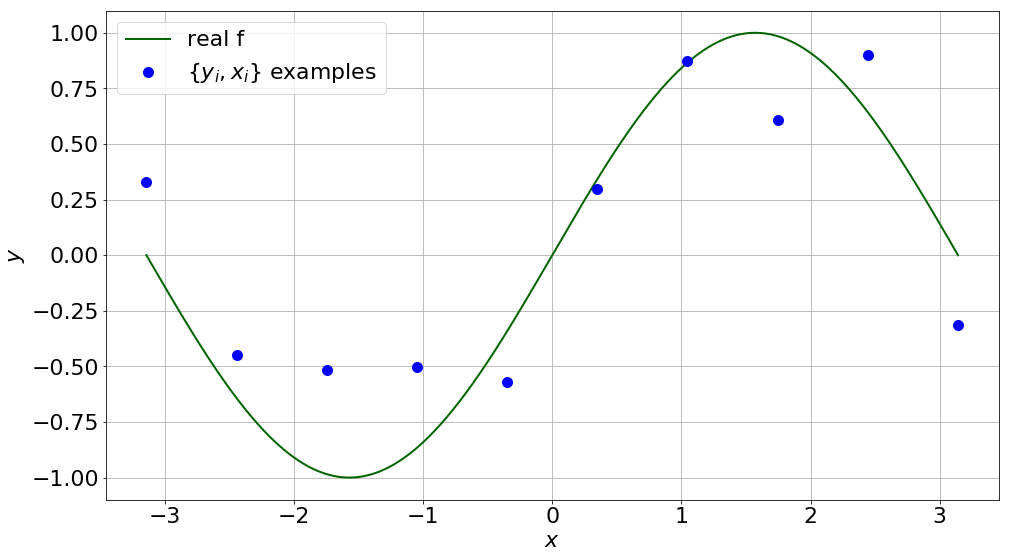

In [36]:
# Inputs
xmin, xmax = -np.pi, np.pi
x_tr = np.linspace(xmin, xmax, 10)
x_ts = np.linspace(xmin, xmax, 1000)

# Latent function and noisy targets
noise = 0.4
f = np.sin(x_ts)
y = np.sin(x_tr) + np.random.randn(len(x_tr)) * noise

# Plot
def plot_data(reg=None, degree=None):
    pl.plot(x_ts.flatten(), f, 'darkgreen', linewidth=2, label='real f')
    pl.plot(x_tr.flatten(), y, 'blue', marker='o', markersize=10, linewidth=0, label='$\{y_i, x_i\}$ examples')
    if reg is not None:
        h = reg.predict(x_ts[:, np.newaxis])
        pl.plot(x_ts.flatten(), h, 'darkred', linewidth=2, label='learned h, degree={}'.format(degree))
    pl.xlabel('$x$')
    pl.ylabel('$y$')
    pl.legend()
    pl.grid()
    
pl.figure(figsize=FIGSIZE)
plot_data()
pl.show()

## Train some models

In [37]:
# Polynomial orders
final_degree = 9
degrees = range(final_degree+1)

models = []
for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LR())
    model.fit(x_tr[:, np.newaxis], y)
    models.append((model, d))

## Plot the predictions

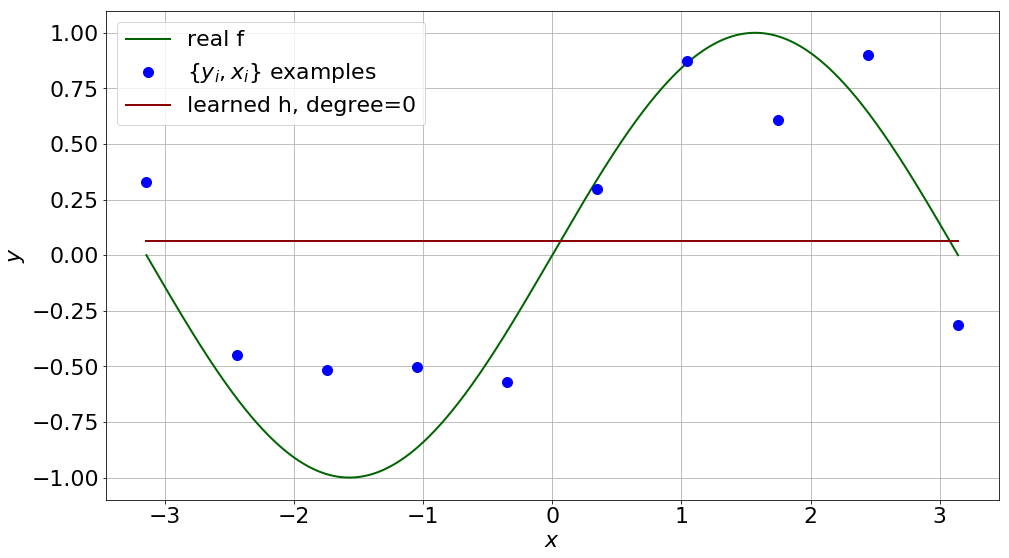

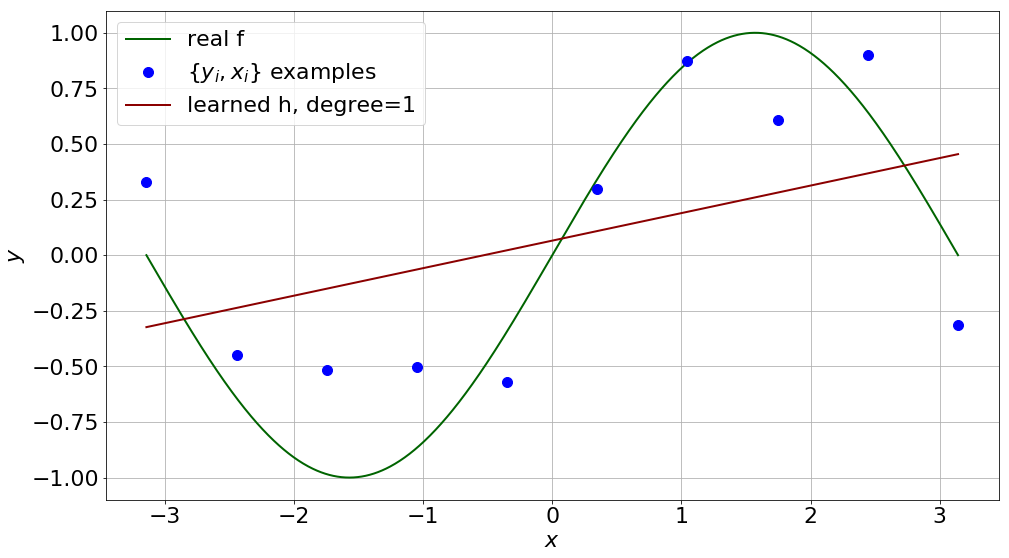

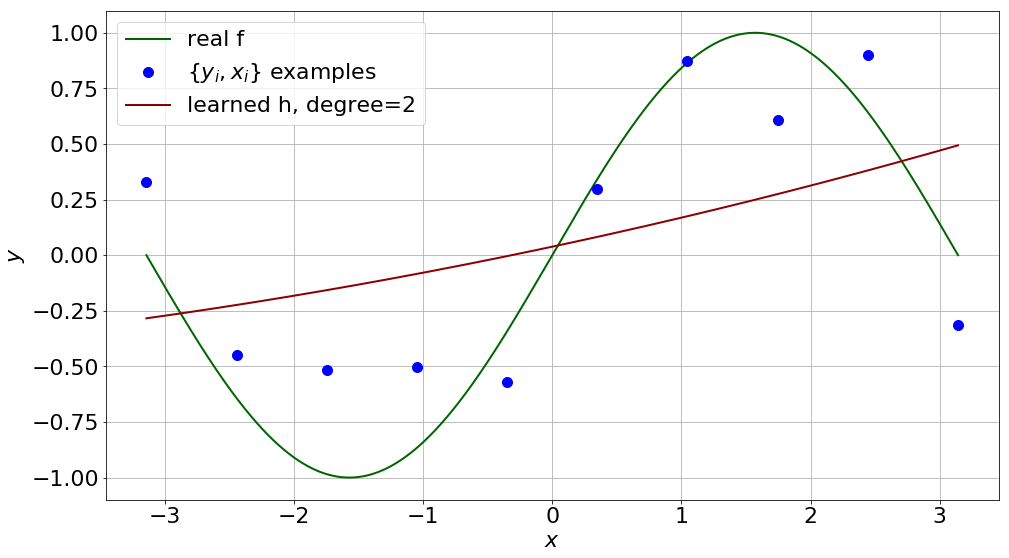

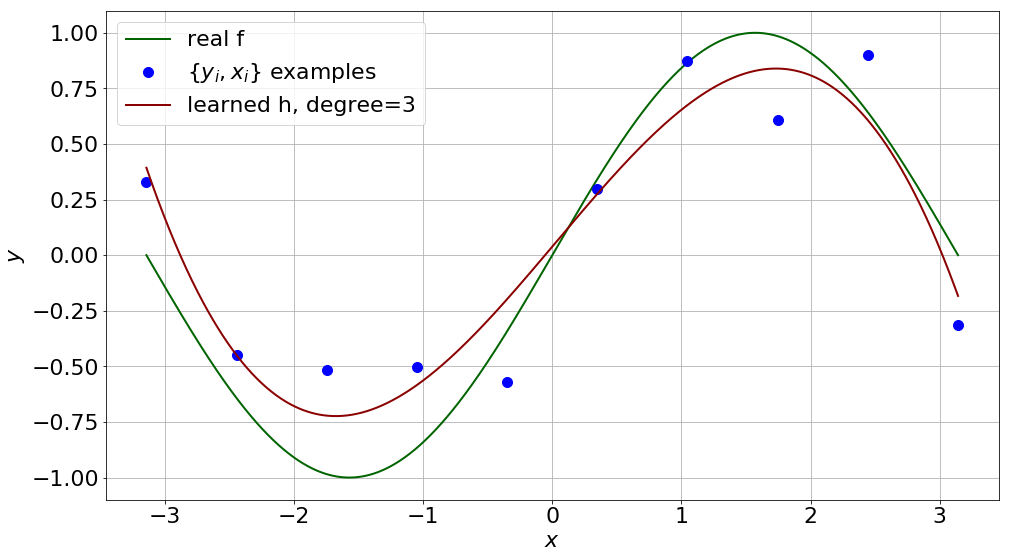

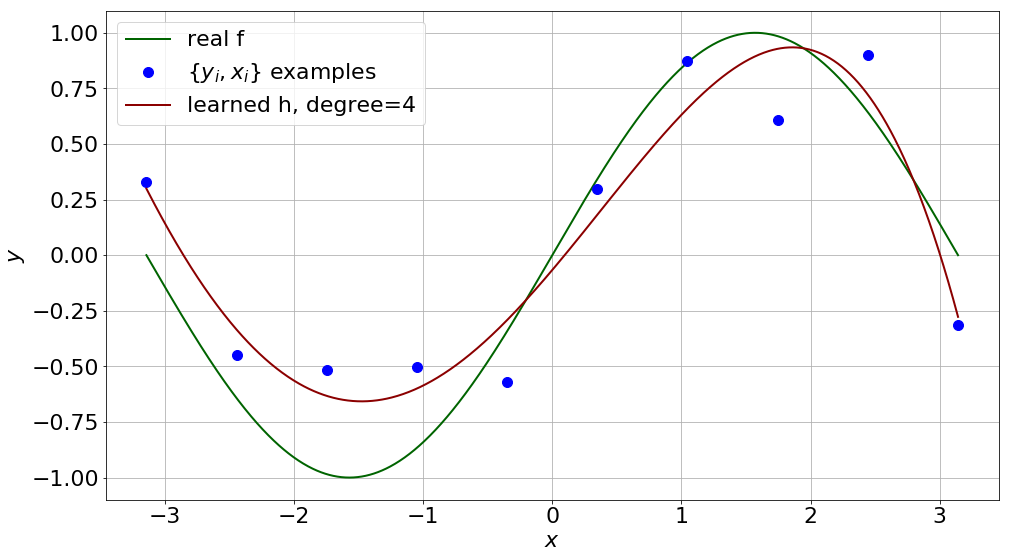

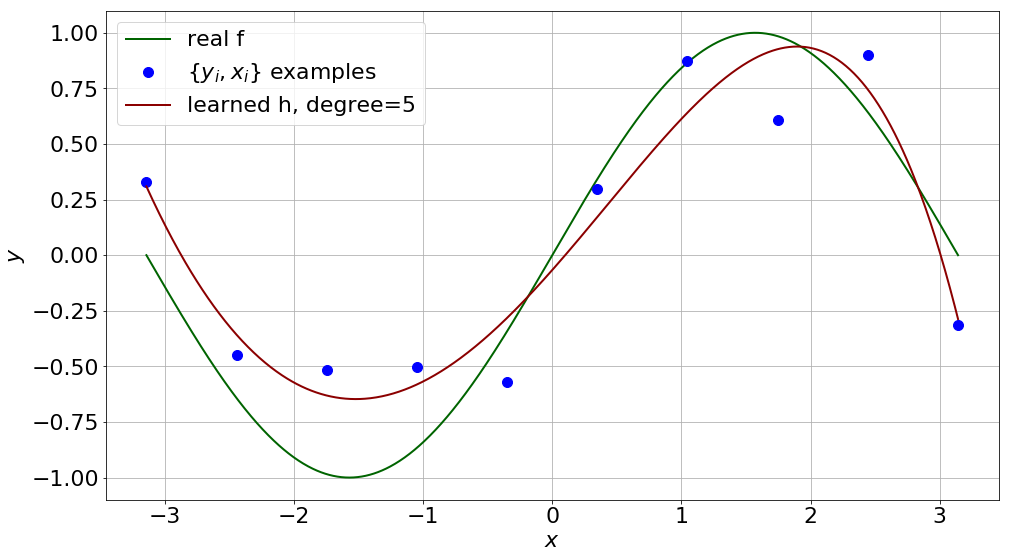

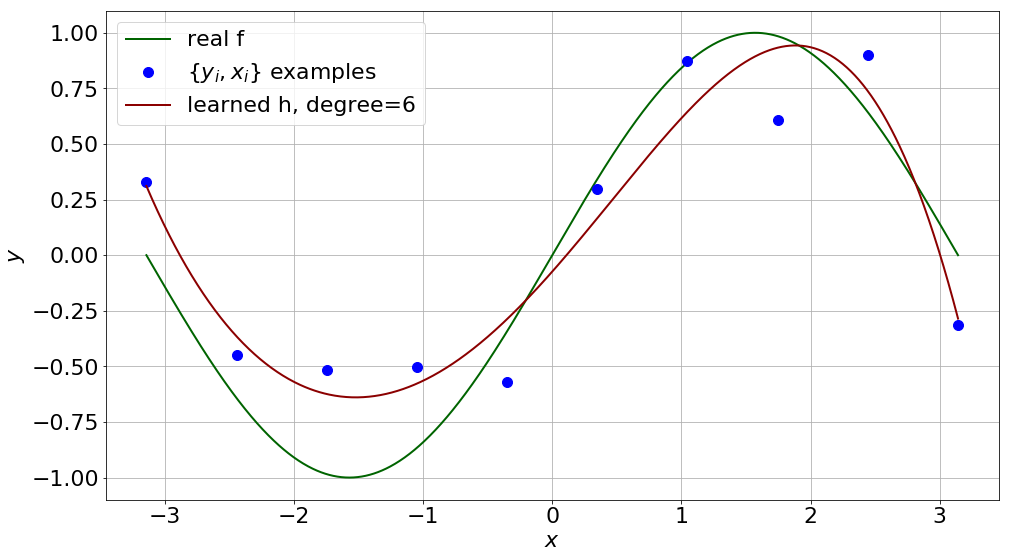

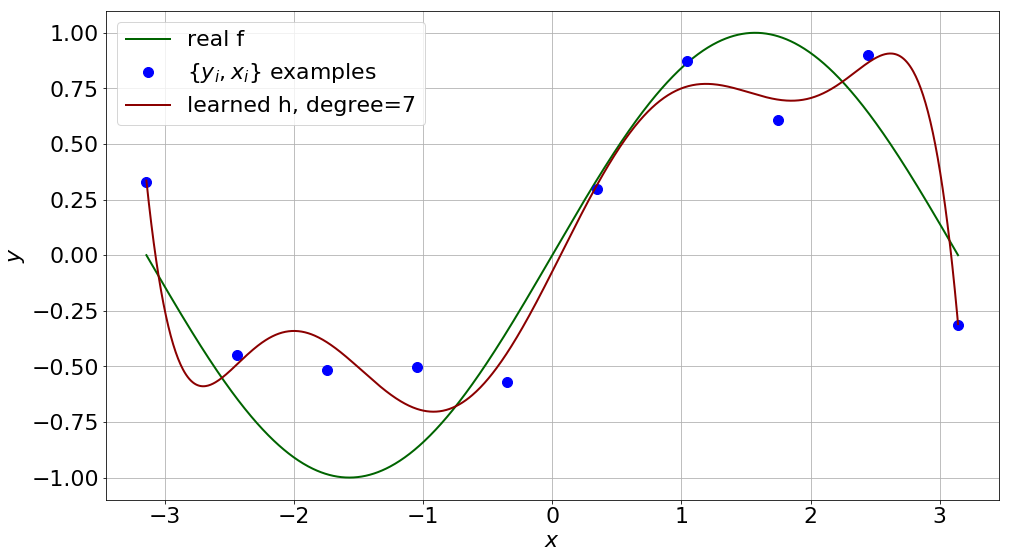

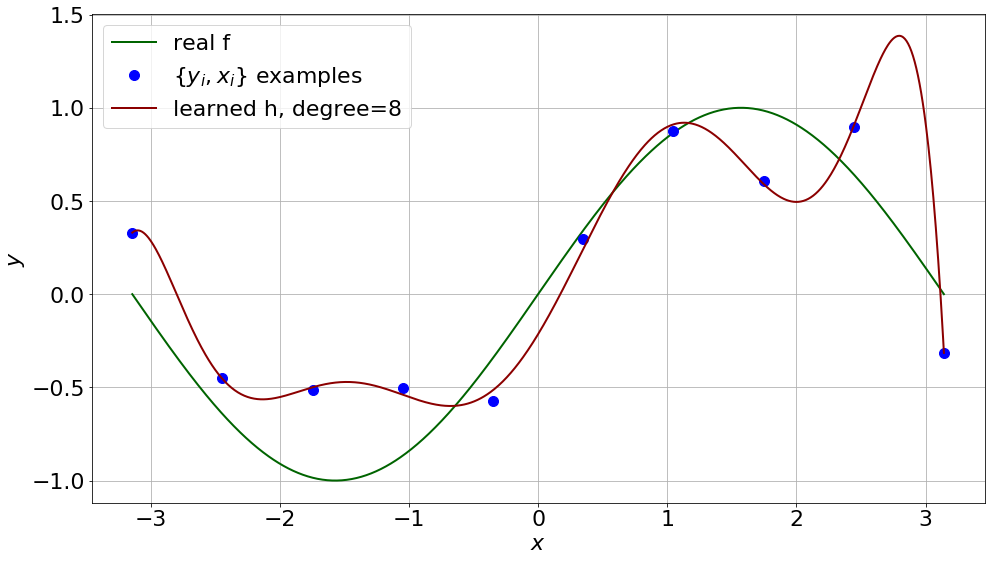

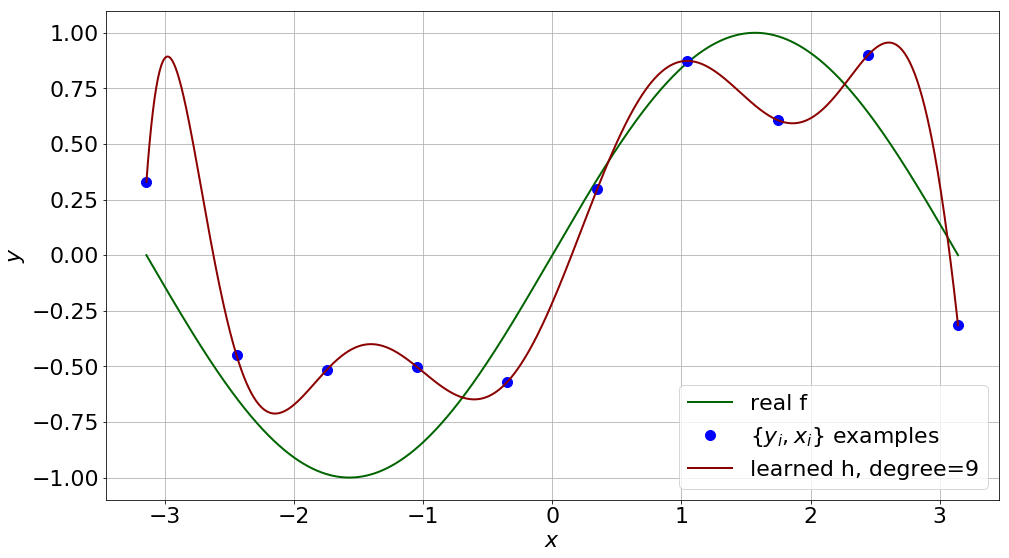

In [38]:
for model in models:
    pl.figure(figsize=FIGSIZE)
    plot_data(*model)
    pl.show()

## Plot the error

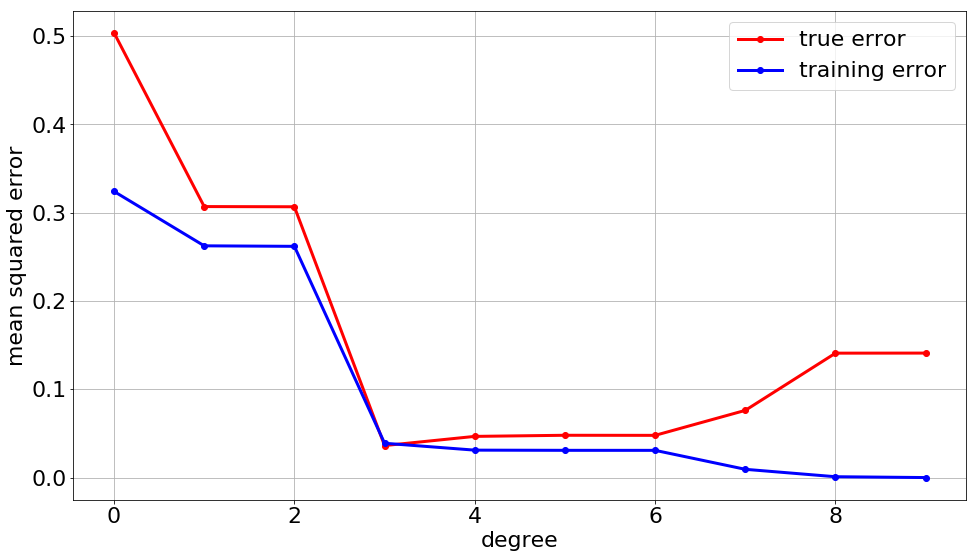

In [41]:
true_error = []
train_error = []

for model, degree in models:
    true_error.append(mean_squared_error(f, model.predict(x_ts[:, np.newaxis])))
    train_error.append(mean_squared_error(y, model.predict(x_tr[:, np.newaxis])))
    
pl.figure(figsize=FIGSIZE)
pl.plot(range(final_degree+1), true_error, 'r-o', linewidth=3, label='true error')
pl.plot(range(final_degree+1), train_error, 'b-o', linewidth=3, label='training error')
pl.xlabel('degree')
pl.ylabel('mean squared error')
pl.legend()
pl.grid()
pl.show()